In [1]:
from random import sample
from datetime import date, datetime
from pydbgen import pydbgen
import pandas as pd
import numpy as np 
import random
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(1)
random.seed(1)

# Age

In [3]:
age = np.round(np.random.normal(40, 10, 250))
simulations_df = pd.DataFrame(age, columns = ['Age'])

(array([ 4.,  7., 26., 33., 53., 49., 41., 18., 13.,  6.]),
 array([16. , 20.9, 25.8, 30.7, 35.6, 40.5, 45.4, 50.3, 55.2, 60.1, 65. ]),
 <BarContainer object of 10 artists>)

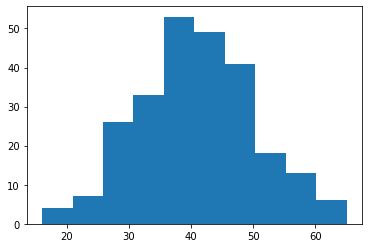

In [4]:
plt.hist(simulations_df['Age'])

# Name and Gender

In [5]:
first_names_gender = (pd.read_csv('data/name_gender_dataset.csv'))[['Name', 'Gender']]
first_names_gender = first_names_gender.sample(n = 250, random_state=1) # randomly sample
first_names_gender = first_names_gender.rename(columns = {'Name' : 'First_Name'})

first_names_gender.reset_index(drop=True, inplace=True)

In [6]:
last_names = (pd.read_csv('data/most-common-name_surnames.csv'))['name']
last_names = last_names.sample(250, random_state=1)
last_names = last_names.apply(func = lambda elem : elem[0] + elem[1:].lower()) # put everything in lower case
                                                                               # except the first letter 
last_names.reset_index(drop=True, inplace=True)

simulations_df = pd.concat([simulations_df, last_names, first_names_gender], axis = 1)
simulations_df = simulations_df.rename(columns = {'name' : 'Last_Name'})

# Weight, Height and BMI

In [7]:
# Create height, weight and bmi variables

weight_height = pd.read_csv('data/weight-height.csv')
weight_height['Height'] = weight_height['Height']/100

# Some heights are too high or too low, remove them:
weight_height = weight_height.loc[(weight_height["Height"] < 2) & (weight_height["Height"]> 1.4)]

# Create bmi
weight_height['BMI'] = (weight_height['Weight']/(weight_height['Height'])**2)

weight_height["Height"] = weight_height["Height"].apply(lambda a : round(a, 2))
weight_height["BMI"] = weight_height["BMI"].apply(lambda a : round(a, 1))

In [8]:
# Concatenate with simulations_df in accordance with Gender

n_female = len(simulations_df.loc[simulations_df["Gender"] == "F"])
n_male = len(simulations_df.loc[simulations_df["Gender"] == "M"])

simulations_df["BMI"] = np.nan
simulations_df["Height"] = np.nan

male_bmi_height = weight_height.loc[weight_height["Gender"] == "Male"]
male_height = iter(male_bmi_height.sample(n_male, random_state = 1)["Height"])
male_bmi = iter(male_bmi_height.sample(n_male, random_state = 1)["BMI"])

female_bmi_height = weight_height.loc[weight_height["Gender"] == "Female"]
female_height = iter(female_bmi_height.sample(n_female, random_state = 1)["Height"])
female_bmi = iter(female_bmi_height.sample(n_female, random_state = 1)["BMI"])

for index, gender in enumerate(simulations_df["Gender"]):
    if gender == "M":
        simulations_df.loc[index, "BMI"] = next(male_bmi)
        simulations_df.loc[index, "Height"] = next(male_height)
    else:
        simulations_df.loc[index, "BMI"] = next(female_bmi)
        simulations_df.loc[index, "Height"] = next(female_height)

(array([15., 30., 30., 21., 26., 33., 27., 30., 27., 11.]),
 array([17.3 , 18.94, 20.58, 22.22, 23.86, 25.5 , 27.14, 28.78, 30.42,
        32.06, 33.7 ]),
 <BarContainer object of 10 artists>)

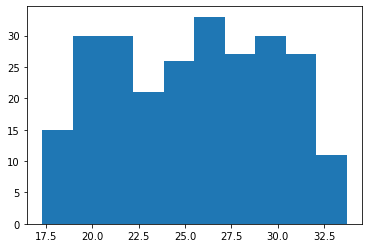

In [9]:
plt.hist(simulations_df['BMI'])

(array([36., 37., 35., 27., 23., 20., 20., 23., 15., 14.]),
 array([1.4 , 1.46, 1.52, 1.58, 1.64, 1.7 , 1.76, 1.82, 1.88, 1.94, 2.  ]),
 <BarContainer object of 10 artists>)

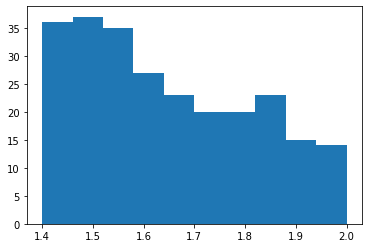

In [10]:
plt.hist(simulations_df['Height'])

# Case-Control Status

In [11]:
case_control = ['case', 'control']
case_control_df = random.choices(case_control, k = 250)
case_control_df = pd.DataFrame(case_control_df, columns = ['case_control_status'])

# Education Level

In [12]:
education_level = ['primary', 'high school', 'bachelor', 'master', 'phD']
education_df = np.random.choice(education_level, 250, p = [0.35, 0.3, 0.2, 0.1, 0.05])
education_df = pd.DataFrame(education_df, columns = ['education_level'])

Text(0.5, 1.0, 'Distribution of education levels')

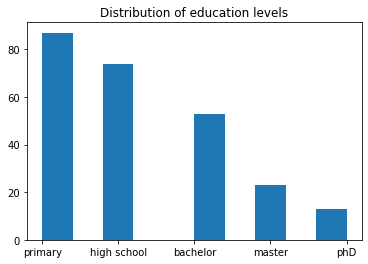

In [13]:
plt.hist(education_df)
plt.title("Distribution of education levels")

# Sample ID

In [14]:
sample_id = ['A' + str(f"{i:03}") for i in range(1,251)]
sample_id = pd.DataFrame(sample_id, columns = ['sample_id'])

# SNP Values

In [15]:
snp_df = np.random.randint(0, 3, (250, 5)) # [0, 3) integer
snp_df = pd.DataFrame(snp_df)
snp_df.columns = ["snp1", "snp2", "snp3", "snp4", "snp5"]

# Gene Expression Values

In [16]:
gene_df = np.random.uniform(-1, 1, (250, 10))
gene_df = pd.DataFrame(gene_df)
gene_df.columns = ["gene1", "gene2", "gene3", "gene4", "gene5", 
                  "gene6", "gene7", "gene8", "gene9", "gene10", ]

# Country and City

In [17]:
country_city = pd.read_csv('data/worldcities.csv')
country_city_df = country_city[['city', 'country']]
country_city_df = country_city_df.sample(250, random_state = 1)

country_city_df.reset_index(drop=True, inplace=True)

# Combine all last variables and put them in order

In [18]:
simulations_df = pd.concat([simulations_df, case_control_df, education_df, sample_id, snp_df, gene_df, country_city_df], axis = 1)

In [19]:
columns_order = ["sample_id", "First_Name", "Last_Name", "Age", "Gender", "BMI", "Height", "country", "city", "case_control_status", "education_level", "gene1", "gene2", "gene3", "gene4", "gene5", "gene6", "gene7", "gene8", "gene9", "gene10", "snp1", "snp2", "snp3", "snp4", "snp5"]

simulations_df = simulations_df[columns_order]

In [20]:
simulations_df

,sample_id,First_Name,Last_Name,Age,Gender,BMI,Height,country,city,case_control_status,...,gene6,gene7,gene8,gene9,gene10,snp1,snp2,snp3,snp4,snp5
0,A001,Semideo,Aguirre,56.0,M,31.5,1.40,United States,Schuyler Falls,case,...,0.620586,0.868318,0.000074,-0.413991,0.811471,2,1,0,2,1
1,A002,Sheri,Mcmahon,34.0,F,26.0,1.62,Chile,Punta Arenas,control,...,-0.632641,0.168100,-0.096128,0.874404,-0.156334,0,2,2,2,0
2,A003,Necati,Parsons,35.0,M,25.1,1.61,France,Saint-Raphaël,control,...,-0.201313,0.816762,-0.809215,0.091488,-0.101348,1,1,1,1,2
3,A004,Monyka,Griffith,29.0,F,24.1,1.68,Brazil,Guimarânia,case,...,-0.282730,0.120301,0.956848,-0.062068,-0.733189,2,2,1,1,2
4,A005,Rainer-Francis,Gilbert,49.0,M,19.2,1.87,Malta,Mosta,case,...,0.720499,-0.015530,-0.036930,-0.596633,0.285721,1,1,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,A246,Sabrinia,Quinn,47.0,F,23.8,1.68,Belarus,Babruysk,case,...,-0.601289,-0.821697,-0.039558,0.028593,-0.178867,0,2,2,1,0
246,A247,Zolah,Burch,46.0,F,32.1,1.42,Germany,Mittweida,control,...,-0.685567,-0.727905,-0.844440,-0.077899,-0.431079,2,2,1,2,2
247,A248,Falen,Tate,36.0,F,32.0,1.41,Uganda,Kumi,case,...,0.386496,0.327661,-0.845772,0.426164,0.767303,2,0,1,2,2
248,A249,Harroll,Olson,58.0,M,24.7,1.64,United Kingdom,Tipton,case,...,0.627283,-0.481163,0.619334,0.078724,-0.762134,2,2,1,0,0


In [21]:
simulations_df.to_csv("Data/Simulations_df.csv")